In [42]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
df = pd.read_csv("Data_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [44]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
#find categorical columns

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 8 categorical variables

The categorical variables are :

 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [46]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [47]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to the 'Gender' column
df.dropna(subset=['Gender'], inplace = True)

In [49]:
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Encoded
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1


In [50]:
# handle numerical missing data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [51]:
#handle categorical missing data
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [52]:
df.isnull().sum()
# Handle missing values (if any)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Gender_Encoded       0
dtype: int64

In [53]:
#Loan_Status column Labeling
df['Loan_Status'].replace(("Y","N"),(0,1), inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Encoded
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.017271,360.0,1.0,Urban,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0,1


In [54]:
scount = df[df['Loan_Status'] == 0]['Loan_Status'].count()
lcount = df[df['Loan_Status'] ==1]['Loan_Status'].count()

data1 = {"Loan Approval Status":[scount, lcount]}
#gives the count of short and long term
termDF = pd.DataFrame(data1, index=["Approved", "Not approved"])
termDF.head()

,Loan Approval Status
Approved,414
Not approved,187


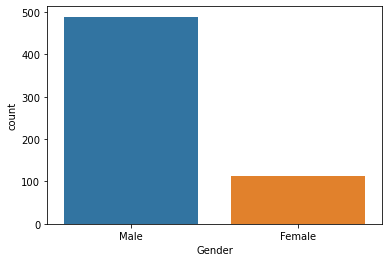

In [55]:
sns.countplot(df['Gender'])

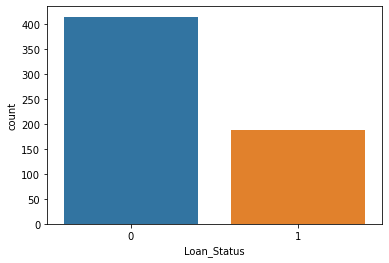

In [56]:
sns.countplot(df['Loan_Status'])

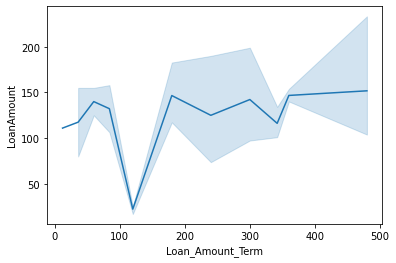

In [57]:
sns.lineplot(x='Loan_Amount_Term',y='LoanAmount', data=df)

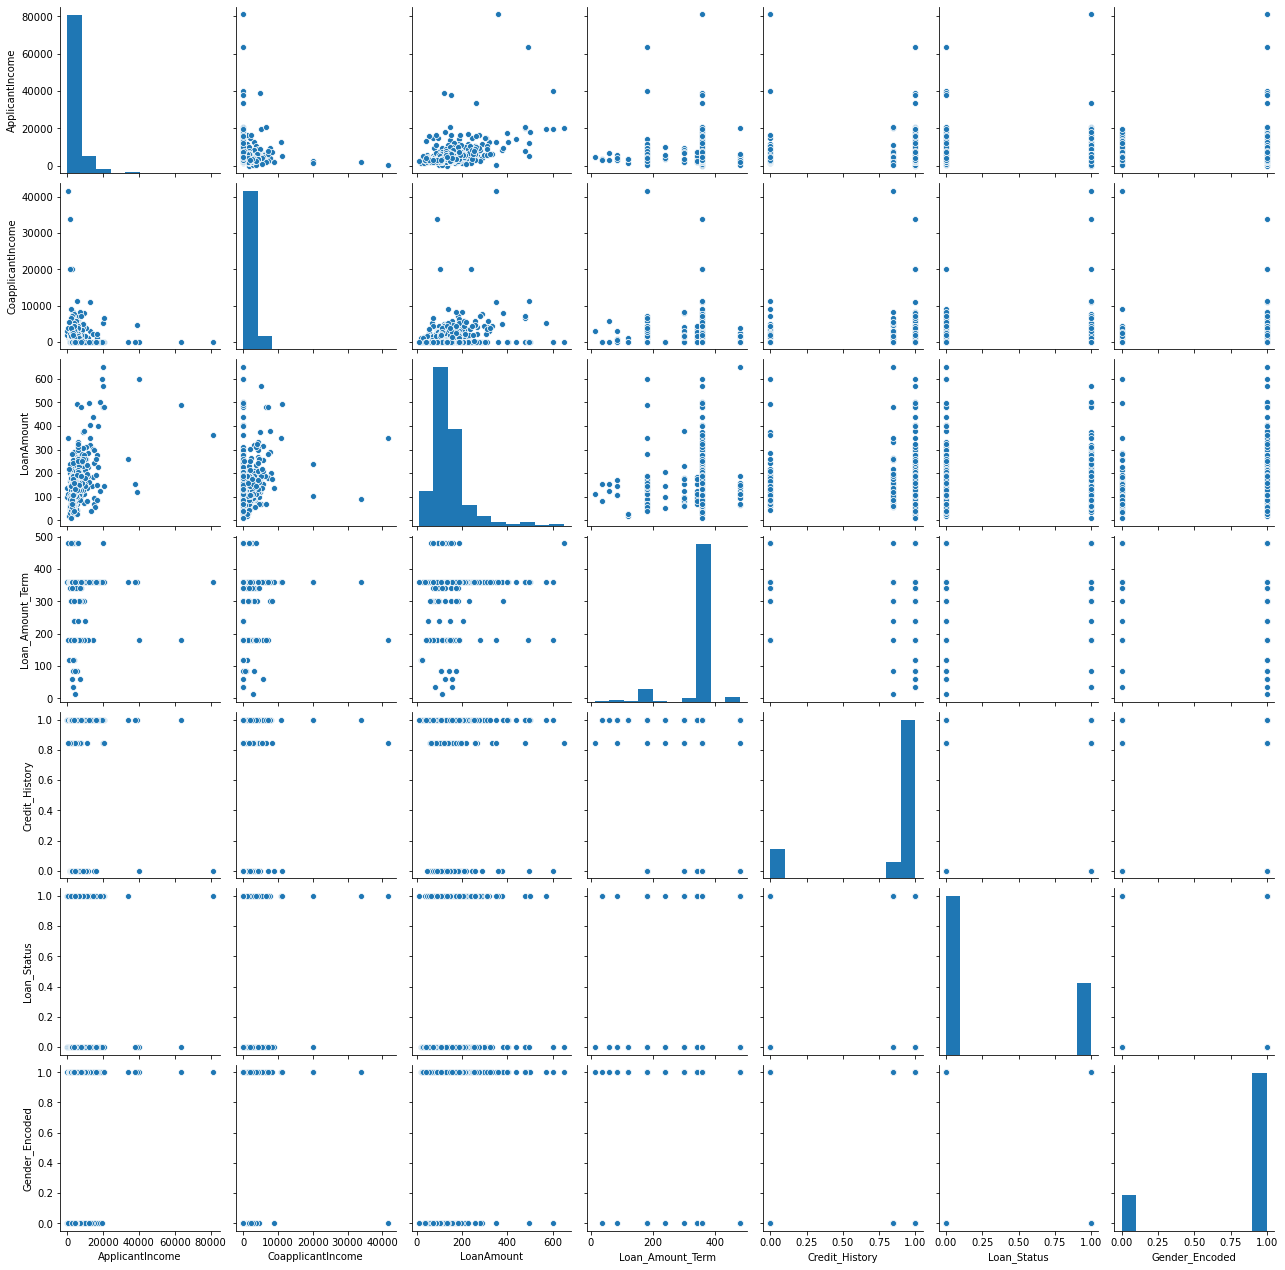

In [58]:
sns.pairplot(data=df)

In [59]:
# specify input and output attributes
x = df.drop(columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Accuracy is 79.47019867549669


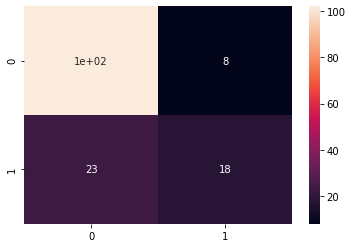

In [60]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
acc1=model1.score(x_test, y_test)*100
print("Accuracy is", acc1)
cm1 = confusion_matrix(y_test, y_pred1)
cm_df1 = sns.heatmap(cm1, annot=True)

Accuracy is 71.52317880794702


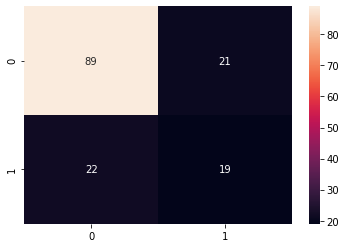

In [61]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
acc2=model2.score(x_test, y_test)*100
print("Accuracy is", acc2)
cm2 = confusion_matrix(y_test, y_pred2)
cm_df2 = sns.heatmap(cm2, annot=True)

Accuracy is 82.78145695364239


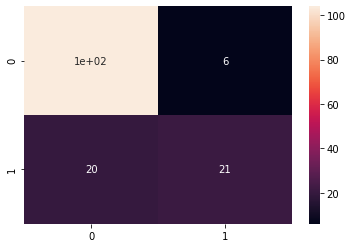

In [62]:
# naive bayes classifier
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
acc3=model3.score(x_test, y_test)*100
print("Accuracy is", acc3)
cm3 = confusion_matrix(y_test, y_pred3)
cm_df3 = sns.heatmap(cm3, annot=True)

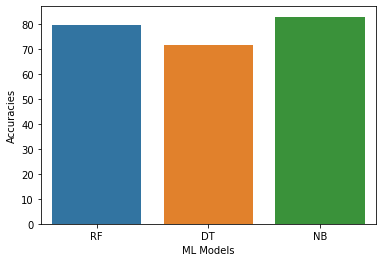

In [63]:
data = {
    'ML Models': ['RF', 'DT', 'NB'],
    'Accuracies': [acc1, acc2, acc3]
}
df = pd.DataFrame(data)

# Create the bar plot
sns.barplot(x='ML Models', y='Accuracies', data=df)

# Display the plot
plt.show()

In [68]:
from sklearn.model_selection import RandomizedSearchCV 
def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(x_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [69]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.776
Test score: 0.821


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [71]:
randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2)) 

Training score: 0.800
Test score: 0.834


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [74]:
import joblib 
joblib.dump(model3, "model.pkl") 
model = joblib.load('model.pkl' ) 
model.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)